<a href="https://colab.research.google.com/github/CoProjOfUnemployeds/TIL-of-Unemployeds/blob/main/210816_JH_Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

활성화 함수의 특징

In [ ]:
#1 활성화 함수는 비선형함수이어야 한다.
#선형함수(은닉층) 여러개를 추가한다고 해도, 활성화 함수가 하나밖에 되지 않는다.
#ex) y = kx 함수에서  x<- kx 에서 결국 k를 W로 치환한다고 하면, 하나의 활성화 함수가 된다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

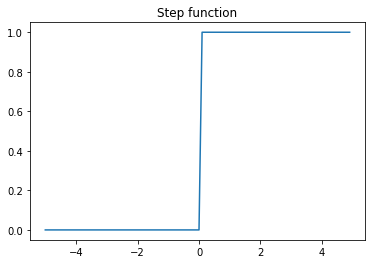

In [ ]:
#2 계단함수(step function)
def step(x):
  return np.array(x>0, dtype = np.int)
x = np.arange(-5.0,5.0,0.1) # -5부터 5까지 0.1간격으로 생성
y = step(x)
plt.title('Step function')
plt.plot(x,y)
plt.show()

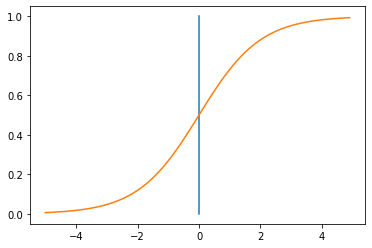

In [ ]:
#3 시그모이드 함수와 기울기 소실
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot([0,0],[1.0,0.0], '-')
plt.plot(x,y)
plt.show()

앞단의 기울기가 0에 수렴하는 부분을 곱하게되면 기울기 소실이 되는 경우가 된다.
back-propagation 과정에서 출력층 근처에서는 전파가 잘 되지만, 앞단으로 갈 수록 제대로 전파되지 않아 은닉층에서는 시그모이드가 지양된다.
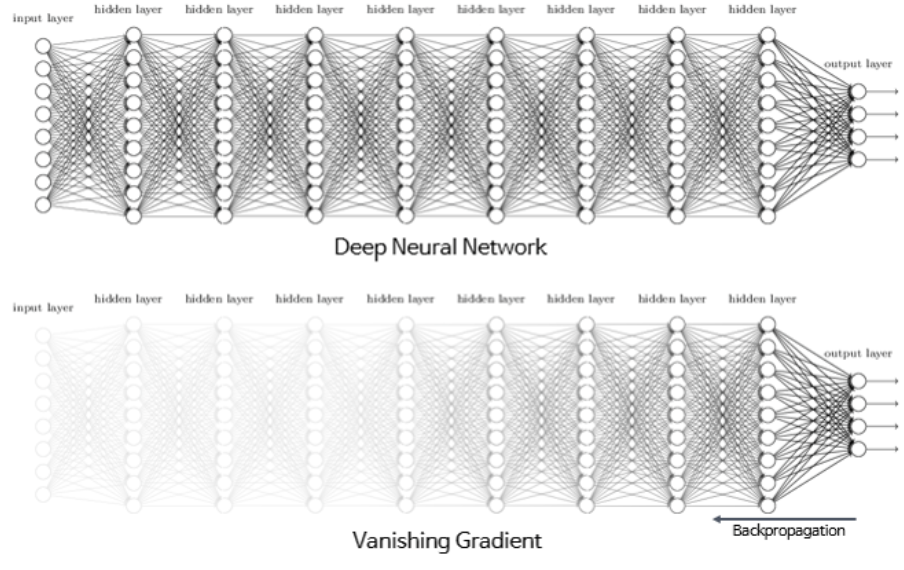

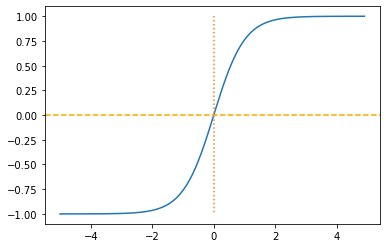

In [ ]:
#4 하이퍼 볼릭 탄젠트(tanh)
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color = 'orange', linestyle = '--')
plt.show()

시그모이드 함수보다 조금더 중앙에 치우쳐져 있는 함수로서 기울기소실 증상이 덜함

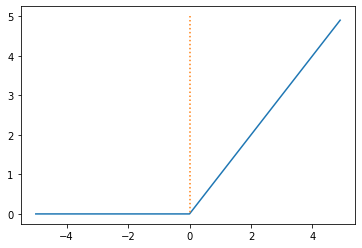

In [ ]:
#5 렐루함수와 리키렐루 함수(ReLU / Leaky ReLU)
def relu(x):
  return np.maximum(0,x) #음수입력을 죽이기

x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.plot([0,0],[5.0,0.0], ':')
plt.show()
#음수입력값이 올 때 뉴런이 죽어버리기 때문에 살리기 힘듦

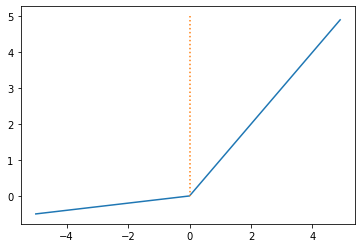

In [ ]:
#일반적으로 a는 0.1
a = 0.1

def leaky_relu(x):
  return np.maximum(a*x, x)

x = np.arange(-5.0,5.0,0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0], ':')
plt.show()
#음수 입력값이여도 뉴런이 죽지않는다.

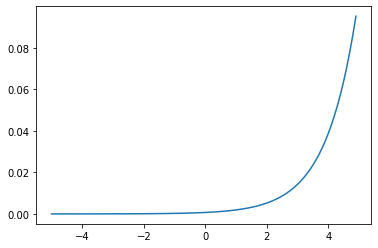

In [ ]:
#6 소프트맥스(softmax)
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.show()

순전파(Forward Propagation)

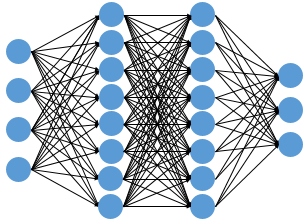

In [ ]:
from keras.model import Sequential
from keras.layer import Dense
model = Sequential()
# 은닉층에는 relu 함수 적용
model.add(Dense(8, input_dim = 4, init='uniform', activation='relu'))
model.add(Dense(8, input_dim = 8, activation = 'relu'))
# 출력층에는 softmax / logistic 회귀가 적용됨 
model.add(Dense(3, input_dim = 8, activation = 'softmax'))